In [1]:
# Data Processiong library
import pandas as pd
import numpy as np

# Visualizations library
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score ,mean_squared_error


In [2]:
car=pd.read_csv('sa_car.csv')
car

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,Audi,A6,2015,Saudi,Silver,Full,3.0,Gas,Automatic,77000,Riyadh,75000,False
8031,Chevrolet,Camaro,2010,Saudi,Silver,Full,3.6,Gas,Automatic,150000,Riyadh,53000,False
8032,Toyota,Land Cruiser,2013,Gulf Arabic,White,Full,4.6,Gas,Automatic,260,Najran,0,True
8033,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,18500,Aseer,22000,False


In [3]:
car['Price']=car.Price.astype('object')

In [4]:
car.Fuel_Type

0       Gas
1       Gas
2       Gas
3       Gas
4       Gas
       ... 
8030    Gas
8031    Gas
8032    Gas
8033    Gas
8034    Gas
Name: Fuel_Type, Length: 8035, dtype: object

In [5]:
car.describe()

,Year,Engine_Size,Mileage
count,8035.000000,8035.000000,8.035000e+03
mean,2014.097698,3.287729,1.491488e+05
std,5.757228,1.517747,3.474480e+05
min,1963.000000,1.000000,1.000000e+02
25%,2012.000000,2.000000,3.700000e+04
50%,2016.000000,3.000000,1.019600e+05
75%,2018.000000,4.400000,1.950000e+05
max,2022.000000,9.000000,2.000000e+07


In [6]:
car.dtypes

Make            object
Type            object
Year             int64
Origin          object
Color           object
Options         object
Engine_Size    float64
Fuel_Type       object
Gear_Type       object
Mileage          int64
Region          object
Price           object
Negotiable        bool
dtype: object

In [7]:
# Check the null values
car.isnull().sum()

Make           0
Type           0
Year           0
Origin         0
Color          0
Options        0
Engine_Size    0
Fuel_Type      0
Gear_Type      0
Mileage        0
Region         0
Price          0
Negotiable     0
dtype: int64

In [8]:
#delete Rank column 
car.drop('Negotiable', axis=1,inplace=True)
car

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500
...,...,...,...,...,...,...,...,...,...,...,...,...
8030,Audi,A6,2015,Saudi,Silver,Full,3.0,Gas,Automatic,77000,Riyadh,75000
8031,Chevrolet,Camaro,2010,Saudi,Silver,Full,3.6,Gas,Automatic,150000,Riyadh,53000
8032,Toyota,Land Cruiser,2013,Gulf Arabic,White,Full,4.6,Gas,Automatic,260,Najran,0
8033,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,18500,Aseer,22000


In [9]:
## Check the duplicate
car.duplicated().sum()

3

In [10]:
c=car.drop_duplicates(inplace=True)
car

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500
...,...,...,...,...,...,...,...,...,...,...,...,...
8030,Audi,A6,2015,Saudi,Silver,Full,3.0,Gas,Automatic,77000,Riyadh,75000
8031,Chevrolet,Camaro,2010,Saudi,Silver,Full,3.6,Gas,Automatic,150000,Riyadh,53000
8032,Toyota,Land Cruiser,2013,Gulf Arabic,White,Full,4.6,Gas,Automatic,260,Najran,0
8033,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,18500,Aseer,22000


<AxesSubplot:>

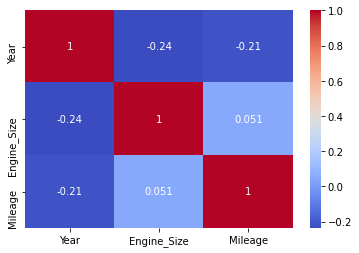

In [11]:
#Correlation of dataFrame
sns.heatmap(data=car.corr(),cmap='coolwarm', annot=True)



Q2: What is the most Popular Origin car?

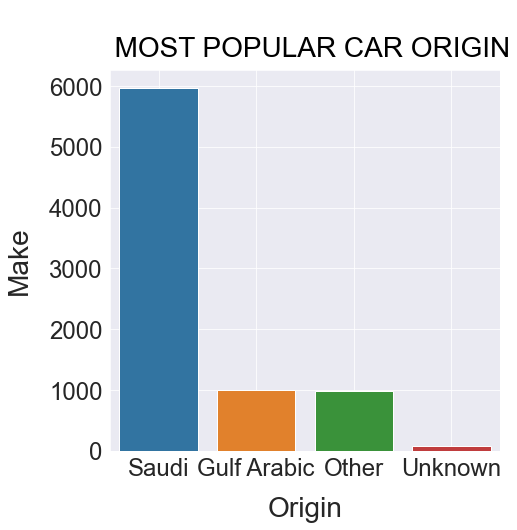

In [12]:
sns.set_style("darkgrid")
num_games=car.groupby('Origin').size().sort_values(ascending=False).reset_index()[:10]
num_games.columns=['Origin', 'Make']
plt.figure(figsize=(7,7))
sns.barplot(y=num_games["Make"], x=num_games["Origin"], linewidth=1)
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.ylabel("Make", labelpad=16, fontsize=28)
plt.xlabel("Origin", labelpad=16, fontsize=28)
plt.grid(True)
plt.title("\n  MOST POPULAR CAR ORIGIN", color='Black', fontsize=28, y=1.02)
plt.show();


In [13]:
Q3: How many car we have by marker?

Object `marker` not found.


In [ ]:
Q3: How many car we have by marker

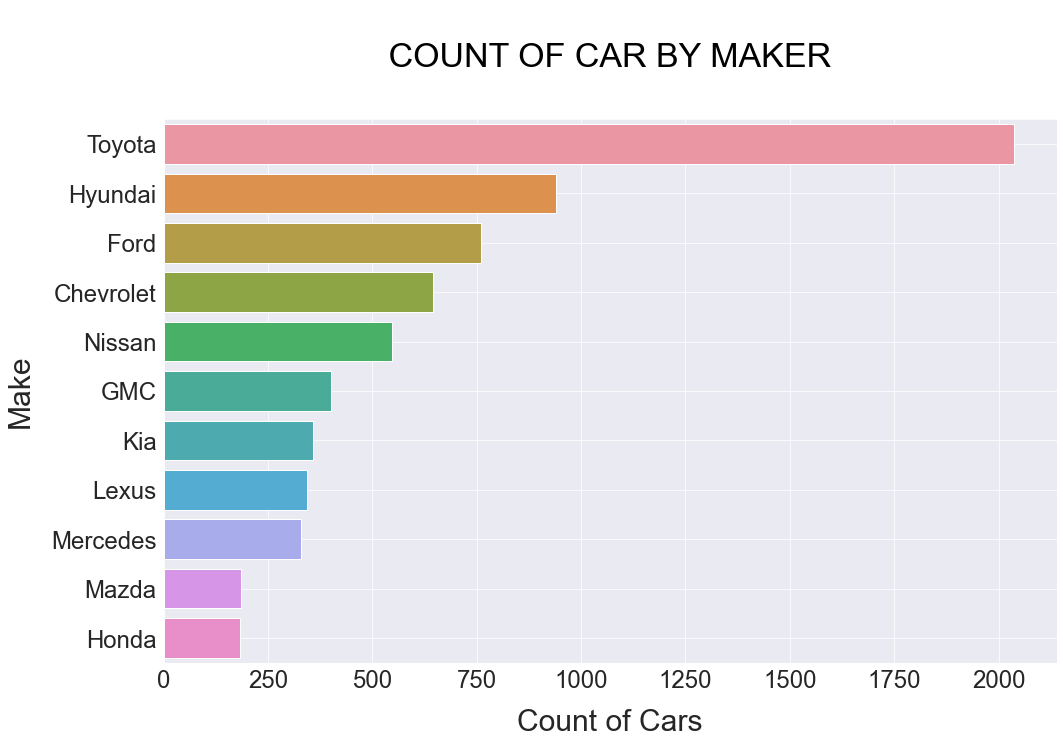

In [14]:
sns.set_style("darkgrid")
num_games=car.groupby('Make').size().sort_values(ascending=False).reset_index()[:11]
num_games.columns=['Make', 'Count of Cars']
plt.figure(figsize=(16,10))
sns.barplot(y=num_games["Make"], x=num_games["Count of Cars"], linewidth=1)
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.ylabel("Make", labelpad=16, fontsize=30)
plt.xlabel("Count of Cars", labelpad=16, fontsize=30)
plt.grid(True)
plt.title("\n COUNT OF CAR BY MAKER \n", color='Black', fontsize=34, y=1.02)
plt.show();


In [17]:
#Q4:Compare prices more exp

In [21]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8032 entries, 0 to 8034
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         8032 non-null   object 
 1   Type         8032 non-null   object 
 2   Year         8032 non-null   int64  
 3   Origin       8032 non-null   object 
 4   Color        8032 non-null   object 
 5   Options      8032 non-null   object 
 6   Engine_Size  8032 non-null   float64
 7   Fuel_Type    8032 non-null   object 
 8   Gear_Type    8032 non-null   object 
 9   Mileage      8032 non-null   int64  
 10  Region       8032 non-null   object 
 11  Price        8032 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 815.8+ KB


In [24]:
car["Price"] = pd.to_numeric(car["Price"], downcast="float")


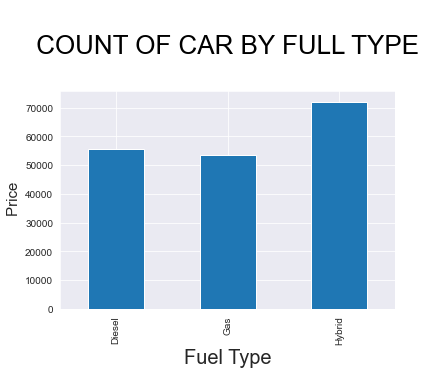

In [25]:
plt1 = car[['Fuel_Type','Price']].groupby("Fuel_Type").mean().plot(kind='bar',legend = False,)
plt1.set_xlabel("Fuel Type",fontsize=20)
plt1.set_ylabel(" Price",fontsize=15)
plt.title("\n COUNT OF CAR BY FULL TYPE \n", color='Black', fontsize=26, y=1.02)
plt.show()

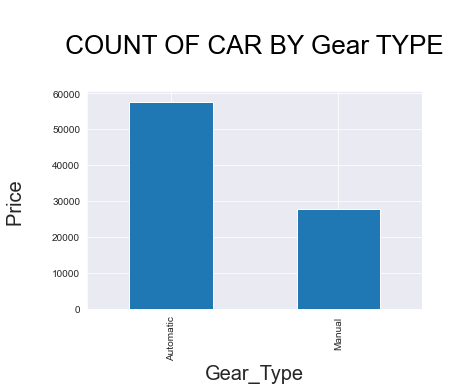

In [26]:
plt1 = car[['Gear_Type','Price']].groupby("Gear_Type").mean().plot(kind='bar',legend = False,)
plt1.set_xlabel("Gear_Type",fontsize=20)
plt1.set_ylabel("Price \n",fontsize=20)
plt.title("\n COUNT OF CAR BY Gear TYPE \n", color='Black', fontsize=26, y=1.02)

plt.show()



In [39]:
car = pd.get_dummies(car, drop_first=False)
car


,Year,Engine_Size,Mileage,Price,Make_Aston Martin,Make_Audi,Make_BMW,Make_BYD,Make_Bentley,Make_Cadillac,...,Region_Najran,Region_Qassim,Region_Qurayyat,Region_Riyadh,Region_Sabya,Region_Sakaka,Region_Tabouk,Region_Taef,Region_Wadi Dawasir,Region_Yanbu
0,2018,5.7,103000,114000.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2016,4.8,5448,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2019,1.5,72418,27500.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2019,1.6,114154,43000.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2019,2.0,41912,59500.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,2015,3.0,77000,75000.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8031,2010,3.6,150000,53000.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8032,2013,4.6,260,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8033,2011,2.5,18500,22000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
x = car.drop(['Price'], axis=1)
y = car.Price

#Splitting into train and test sets for both parameters
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)

# Building the model:
lr = LinearRegression()


# Fit the model on training data:

lr.fit(x_train, y_train)

# Predict the testing data:
lr_predict = lr.predict(x_test)
lr_predict



array([-34873.37948608,  36043.94619751, 182568.43310547, ...,
        50299.57064819,  81284.65005493,  44368.36190796])

In [44]:
from sklearn.metrics import mean_squared_error
y_train_predictions = lr.predict(x_train)
lin_mse = mean_squared_error(y_train, y_train_predictions)
lin_mse


2441439448.486037

In [45]:
car.head()

,Year,Engine_Size,Mileage,Price,Make_Aston Martin,Make_Audi,Make_BMW,Make_BYD,Make_Bentley,Make_Cadillac,...,Region_Najran,Region_Qassim,Region_Qurayyat,Region_Riyadh,Region_Sabya,Region_Sakaka,Region_Tabouk,Region_Taef,Region_Wadi Dawasir,Region_Yanbu
0,2018,5.7,103000,114000.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2016,4.8,5448,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2019,1.5,72418,27500.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2019,1.6,114154,43000.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2019,2.0,41912,59500.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [49]:
lin_mse
from sklearn.metrics import mean_squared_error
y_predictions = lr.predict(x_test)
lin_mse = mean_squared_error(y_test, y_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

18778663613.82682